통계 분석은 데이터 세트의 변수가 서로 어떻게 관련되어 있고 이러한 관계가 다른 변수에 어떻게 의존하는지 이해하는 프로세스입니다. 데이터가 제대로 시각화되면 인간의 시각 시스템이 관계를 나타내는 경향과 패턴을 볼 수 있기 때문에 시각화는 이 프로세스의 핵심 구성 요소가 될 수 있습니다.

이 튜토리얼에서는 세 가지 seaborn 함수에 대해 설명합니다. 우리가 가장 많이 사용할 것은 `replot()`입니다. 산점도와 선도의 두 가지 일반적인 접근 방식을 사용하여 통계적 관계를 시각화하기 위한 수치 수준의 기능입니다. `replot()`은 `FacetGrid`를 다음 두 축 수준 함수 중 하나와 결합합니다.
  - `scatterplot()` (with `kind="scatter"`; the default)
  - `lineplot()` (with `kind="line"`)

우리가 보게 되겠지만, 이러한 함수는 복잡한 데이터 세트 구조를 나타낼 수 있는 단순하고 이해하기 쉬운 데이터 표현을 사용하기 때문에 상당히 밝을 수 있습니다. 색조, 크기 및 스타일의 의미 체계를 사용하여 최대 3개의 추가 변수를 매핑하여 향상될 수 있는 2차원 그래픽을 그리기 때문에 그렇게 할 수 있습니다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

# Relating variables with scatter plots

산점도는 통계 시각화의 핵심입니다. 포인트 클라우드를 사용하여 두 변수의 공동 분포를 설명합니다. 여기서 각 포인트는 데이터 세트의 관찰을 나타냅니다. 이 묘사를 통해 눈은 그들 사이에 의미 있는 관계가 있는지 여부에 대한 상당한 양의 정보를 추론할 수 있습니다.

seaborn에서 산점도를 그리는 방법에는 여러 가지가 있습니다. 두 변수가 모두 숫자일 때 사용해야 하는 가장 기본적인 것은 `scatterplot()` 함수입니다. 범주형 시각화 자습서에서는 산점도를 사용하여 범주형 데이터를 시각화하는 특수 도구를 볼 수 있습니다. `scatterplot()`은 `replot()`의 기본 `kind`입니다(`kind="scatter"`를 설정하여 강제 적용할 수도 있음).

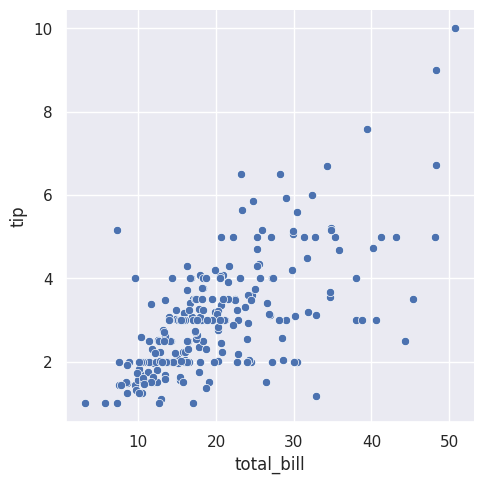

In [7]:
tips = sns.load_dataset("tips")
sns.relplot(data=tips, x="total_bill", y="tip");

포인트가 2차원으로 표시되는 동안 세 번째 변수에 따라 포인트에 색상을 지정하여 플롯에 다른 차원을 추가할 수 있습니다. seaborn에서는 포인트의 색상이 의미를 갖기 때문에 "색상 의미 체계"를 사용한다고 합니다.

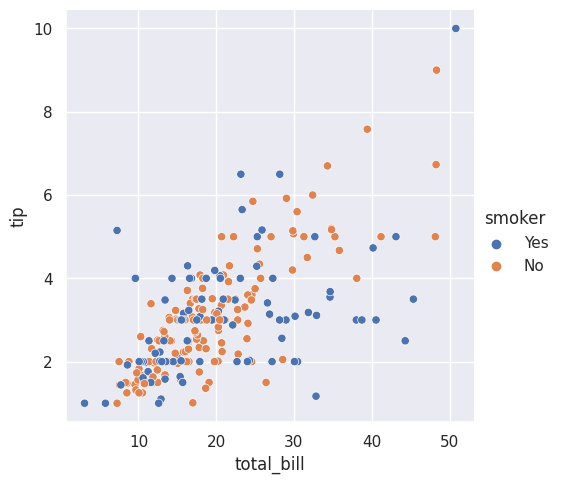

In [6]:
sns.relplot(data=tips, x="total_bill", y="tip", hue="smoker");

클래스 간의 차이점을 강조하고 접근성을 개선하기 위해 각 클래스에 대해 서로 다른 마커 스타일을 사용할 수 있습니다.

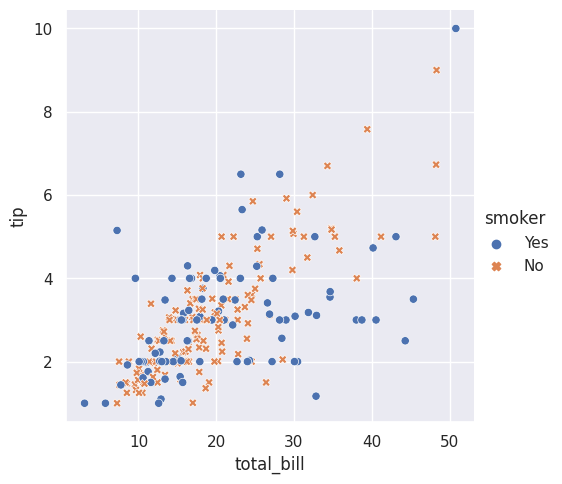

In [5]:
sns.relplot(
    data=tips,
    x="total_bill", y="tip", hue="smoker", style="smoker"
);

각 점의 색조와 스타일을 독립적으로 변경하여 4개의 변수를 나타낼 수도 있습니다. 그러나 눈은 색상보다 모양에 훨씬 덜 민감하기 때문에 주의해서 수행해야 합니다.



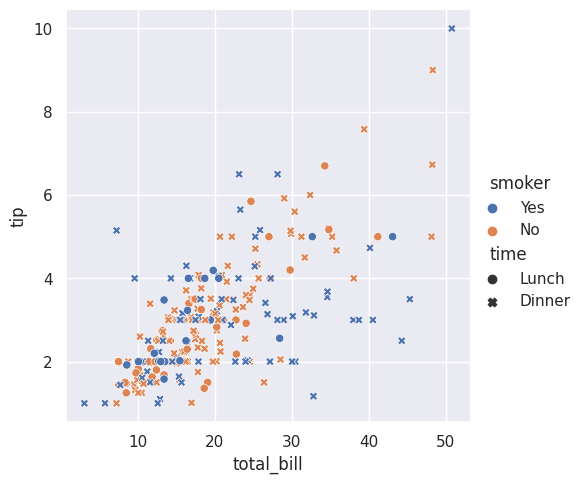

In [8]:
sns.relplot(
    data=tips,
    x="total_bill", y="tip", hue="smoker", style="time",
);

위의 예에서 색조 시맨틱은 범주형이므로 기본 정 성적 팔레트가 적용되었습니다. 색조 시맨틱이 숫자인 경우(특히 부동으로 캐스팅할 수 있는 경우) 기본 색상이 순차적 팔레트로 전환됩니다.

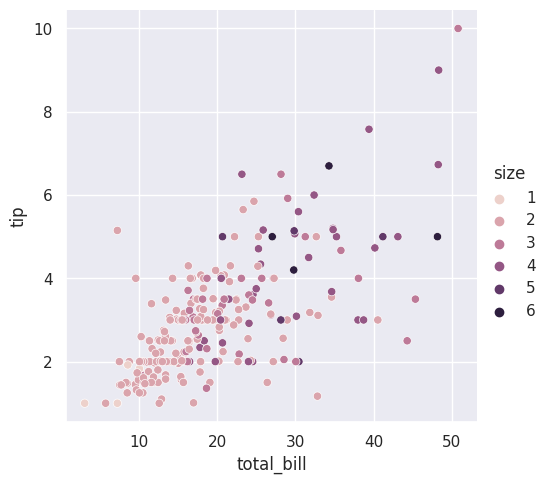

In [9]:
sns.relplot(
    data=tips, x="total_bill", y="tip", hue="size",
);

두 경우 모두 색상 팔레트를 사용자 정의할 수 있습니다. 이를 위한 많은 옵션이 있습니다. 여기서 문자열 인터페이스를 사용하여 순차 팔레트를 다음과 같이 사용자 정의합니다 `cubehelix_palette()`.

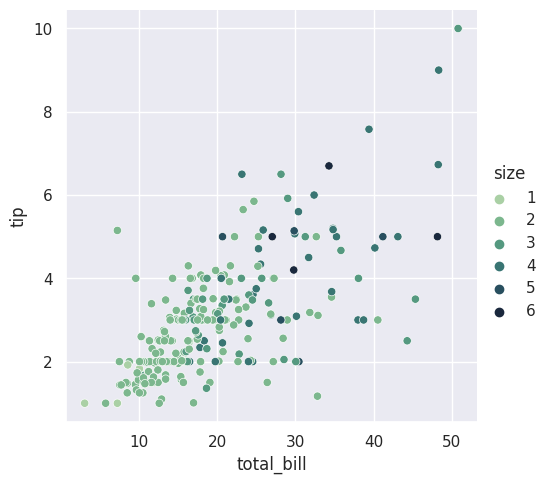

In [10]:
sns.relplot(
    data=tips,
    x="total_bill", y="tip",
    hue="size", palette="ch:r=-.5,l=.75"
);

세 번째 종류의 의미 변수는 각 포인트의 크기를 변경합니다.

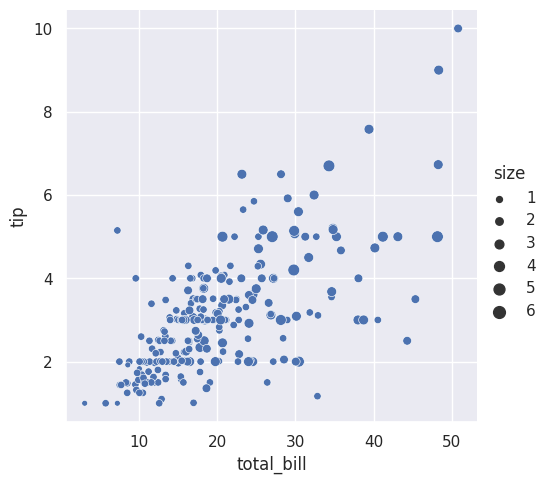

In [11]:
sns.relplot(data=tips, x="total_bill", y="tip", size="size");

통계적 관계를 표시하기 위해 다양한 시맨틱을 사용하는 방법을 사용자 정의하는 추가 예제는 `scatterplot()API` 예제에 나와 있습니다.

# Emphasizing continuity with line plots

산점도는 매우 효과적이지만 보편적으로 최적의 시각화 유형은 없습니다. 대신 시각적 표현은 데이터 세트의 세부 사항과 플롯으로 답변하려는 질문에 맞게 조정되어야 합니다.

일부 데이터 세트의 경우 한 변수의 변화를 시간의 함수 또는 유사한 연속 변수로 이해하고자 할 수 있습니다. 이 상황에서 좋은 선택은 선 그림을 그리는 것입니다. 이 상황에서 좋은 선택은 선 그림을 그리는 것입니다. seaborn에서는 `lineplot()` 함수를 직접 사용하거나 `kind="line"`을 설정하여 `replot()`을 사용하여 이 작업을 수행할 수 있습니다.

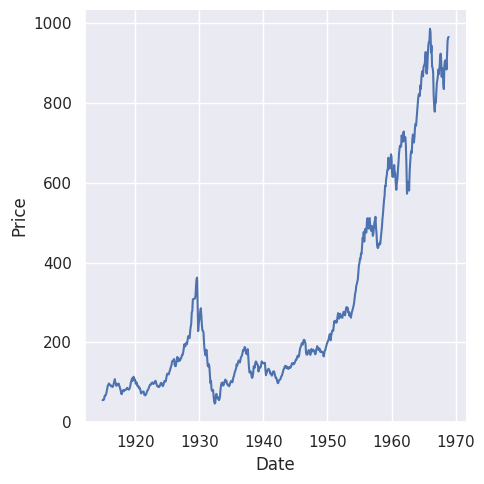

In [12]:
dowjones = sns.load_dataset("dowjones")
sns.relplot(data=dowjones, x="Date", y="Price", kind="line");

## 2-1. Aggregation and representing uncertainty

더 복잡한 데이터 세트는 `x` 변수의 동일한 값에 대해 여러 측정값을 갖습니다. seaborn의 기본 동작은 평균과 평균 주변의 95% 신뢰 구간을 플로팅하여 각 `x` 값에서 여러 측정값을 집계하는 것입니다.

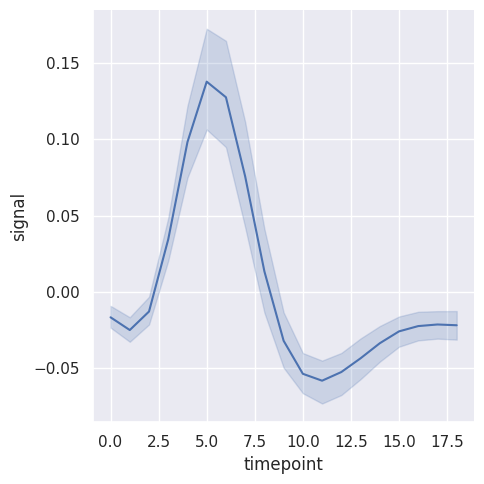

In [13]:
fmri = sns.load_dataset("fmri")
sns.relplot(data=fmri, x="timepoint", y="signal", kind="line");

신뢰 구간은 부트스트래핑을 사용하여 계산되며, 이는 더 큰 데이터 세트의 경우 시간이 많이 소요될 수 있습니다. 따라서 다음과 같이 비활성화할 수 있습니다.

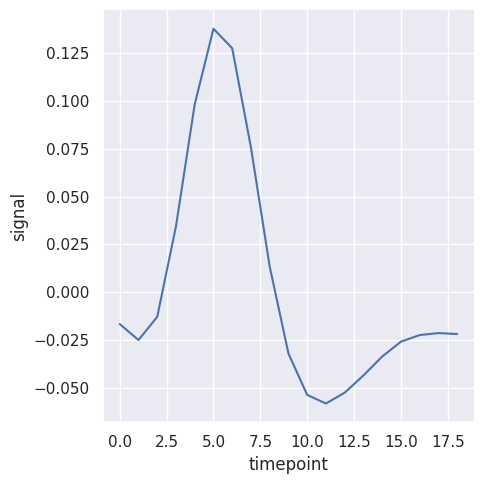

In [14]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", errorbar=None,
);

특히 더 큰 데이터의 경우 또 다른 좋은 옵션은 신뢰 구간 대신 표준 편차를 플로팅하여 각 시점에서 분포의 확산을 나타내는 것입니다.

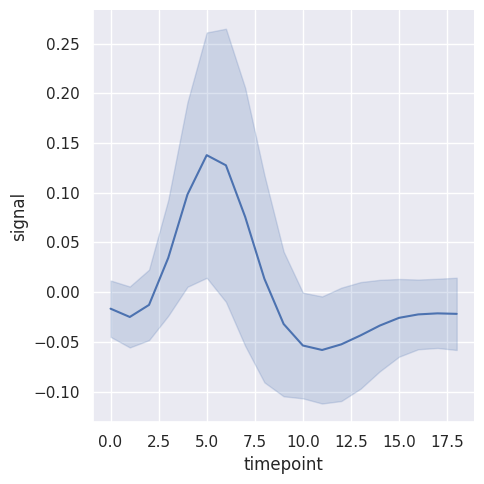

In [15]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", errorbar="sd",
);

집계를 모두 끄려면 추정기 매개변수를 없음으로 설정합니다. 이렇게 하면 데이터에 각 지점에서 여러 관찰이 있는 경우 이상한 효과가 발생할 수 있습니다.

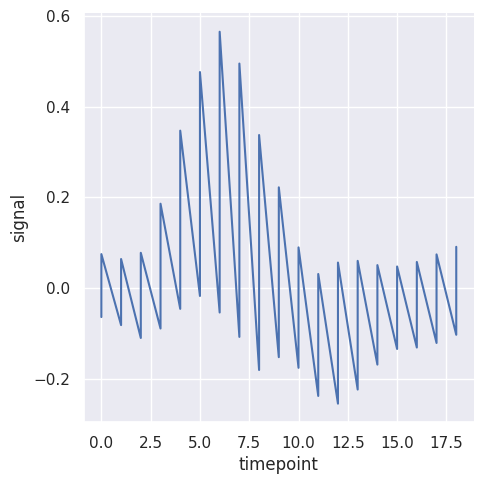

In [16]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal",
    estimator=None,
);

## 2-2. Plotting subsets of data with semantic mappings

`lineplot()` 함수는 `scatterplot()`과 동일한 유연성을 가지고 있습니다. 플롯 요소의 색조, 크기 및 스타일을 수정하여 최대 3개의 추가 변수를 표시할 수 있습니다. 이것은 `scatterplot()`과 동일한 API를 사용하여 수행합니다. 즉, matplotlib에서 선과 점의 모양을 제어하는 ​​매개변수에 대해 멈추고 생각할 필요가 없습니다.

`lineplot()`에서 의미 체계를 사용하면 데이터가 집계되는 방식도 결정됩니다. 예를 들어 두 가지 수준의 색조 시맨틱을 추가하면 플롯이 두 개의 선과 오류 밴드로 분할되고 각각에 해당하는 데이터의 하위 집합을 나타내기 위해 색상이 지정됩니다.

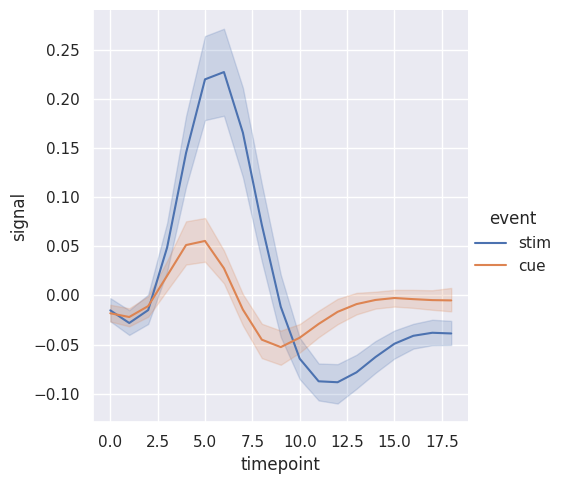

In [17]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", hue="event",
);

라인 플롯에 스타일 시맨틱을 추가하면 기본적으로 라인의 대시 패턴이 변경됩니다.

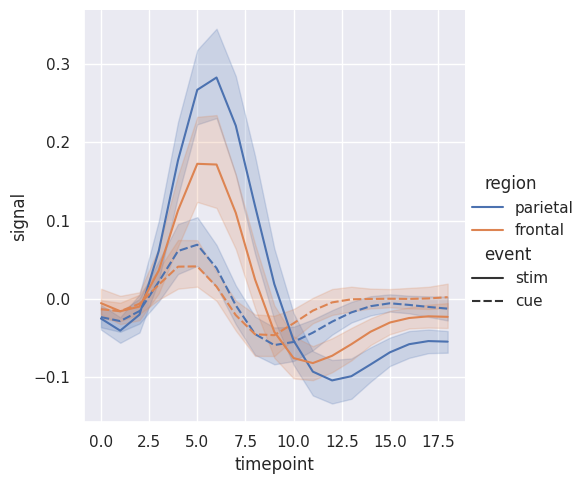

In [18]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal",
    hue="region", style="event",
);

그러나 대시와 함께 또는 대신에 각 관찰에서 사용된 마커로 하위 집합을 식별할 수 있습니다.

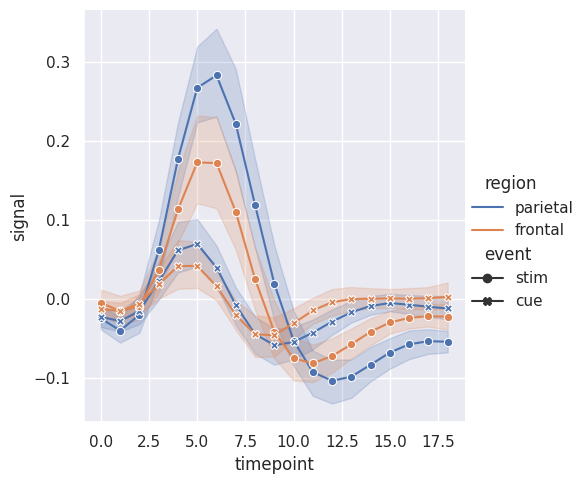

In [19]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", hue="region", style="event",
    dashes=False, markers=True,
);

산점도와 마찬가지로 여러 의미 체계를 사용하여 선 그림을 만들 때는 주의해야 합니다. 때로는 유익하지만 구문 분석하고 해석하기 어려울 수도 있습니다. 그러나 하나의 추가 변수에 대한 변경 사항만 검사하는 경우에도 선의 색상과 스타일을 모두 변경하는 것이 유용할 수 있습니다. 이렇게 하면 흑백으로 인쇄하거나 색맹인 사람이 볼 때 플롯에 더 쉽게 접근할 수 있습니다.

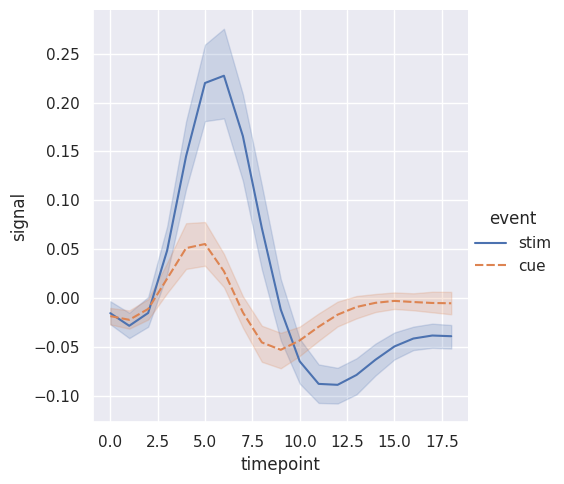

In [20]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", hue="event", style="event",
);

반복 측정 데이터로 작업하는 경우(즉, 여러 번 샘플링된 단위가 있는 경우) 시맨틱을 통해 구분하지 않고 각 샘플링 단위를 개별적으로 그릴 수도 있습니다. 이렇게 하면 범례가 복잡해지는 것을 방지할 수 있습니다.

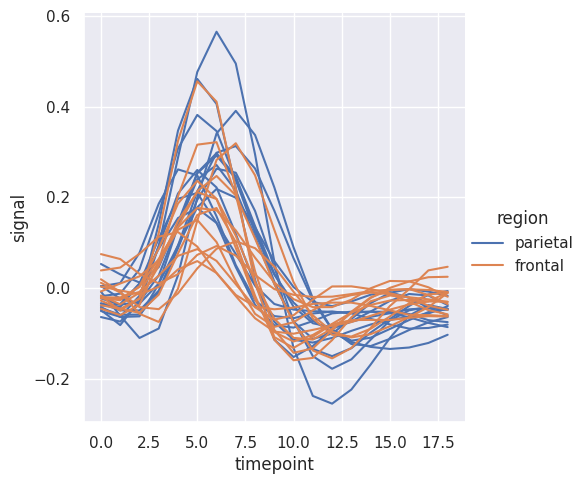

In [21]:
sns.relplot(
    data=fmri.query("event == 'stim'"), kind="line",
    x="timepoint", y="signal", hue="region",
    units="subject", estimator=None,
);


기본 컬러맵과 `lineplot()`의 범례 처리는 색조 의미 체계가 범주형인지 숫자형인지에 따라 달라집니다.

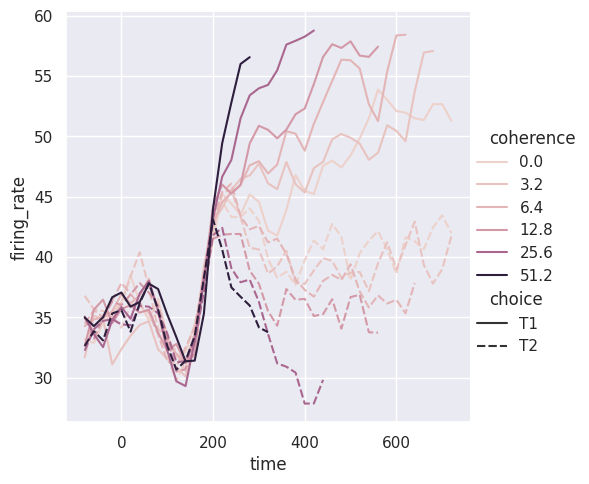

In [22]:
dots = sns.load_dataset("dots").query("align == 'dots'")
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate",
    hue="coherence", style="choice",
);


`hue` 변수가 숫자인 경우에도 선형 색상 스케일로 제대로 표현되지 않을 수 있습니다. `hue` 변수의 수준이 대수적으로 조정되는 경우입니다. 목록이나 사전을 전달하여 각 줄에 특정 색상 값을 제공할 수 있습니다.

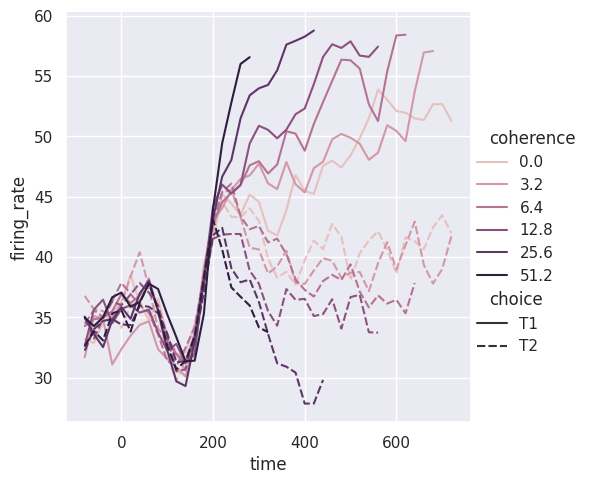

In [23]:
palette = sns.cubehelix_palette(light=.8, n_colors=6)
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate",
    hue="coherence", style="choice", palette=palette,
);

또는 색상표가 정규화되는 방식을 변경할 수 있습니다.

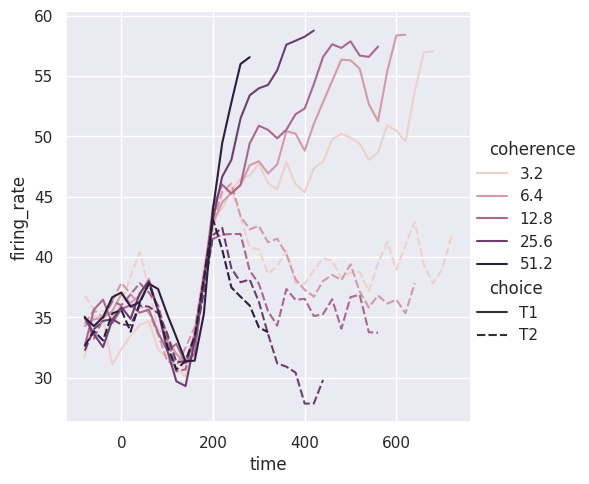

In [24]:
from matplotlib.colors import LogNorm
palette = sns.cubehelix_palette(light=.7, n_colors=6)
sns.relplot(
    data=dots.query("coherence > 0"), kind="line",
    x="time", y="firing_rate",
    hue="coherence", style="choice",
    hue_norm=LogNorm(),
);

세 번째 의미인 크기는 줄의 너비를 변경합니다.

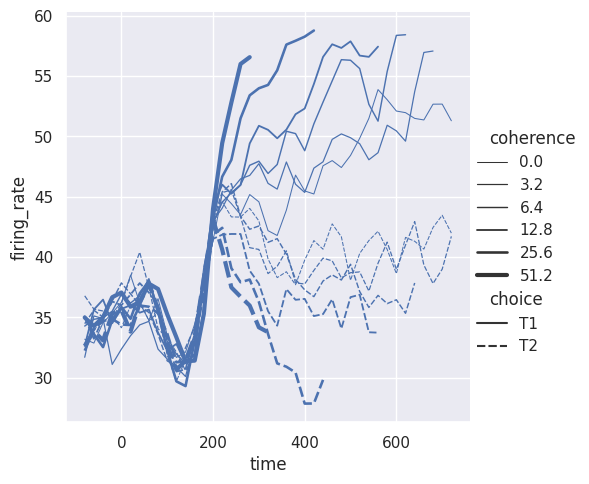

In [26]:
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate",
    size="coherence", style="choice",
);


`size` 변수는 일반적으로 숫자이지만 범주형 변수를 선 너비와 매핑할 수도 있습니다. "굵은" 선과 "가는" 선보다 훨씬 더 구분하기 어렵기 때문에 그렇게 할 때 주의하십시오. 그러나 선의 변동 빈도가 높은 경우 대시를 인식하기 어려울 수 있으므로 이 경우 다른 너비를 사용하는 것이 더 효과적일 수 있습니다.

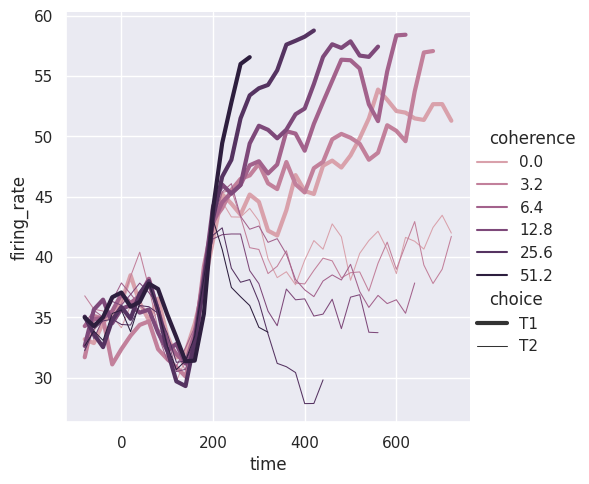

In [27]:
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate",
    hue="coherence", size="choice", palette=palette,
);

## 2-3. Controlling sorting and orientation


`lineplot()`은 `x`의 함수로 `y`를 가장 자주 그리려고 한다고 가정하기 때문에 기본 동작은 플로팅하기 전에 `x` 값을 기준으로 데이터를 정렬하는 것입니다. 그러나 다음과 같이 비활성화할 수 있습니다.

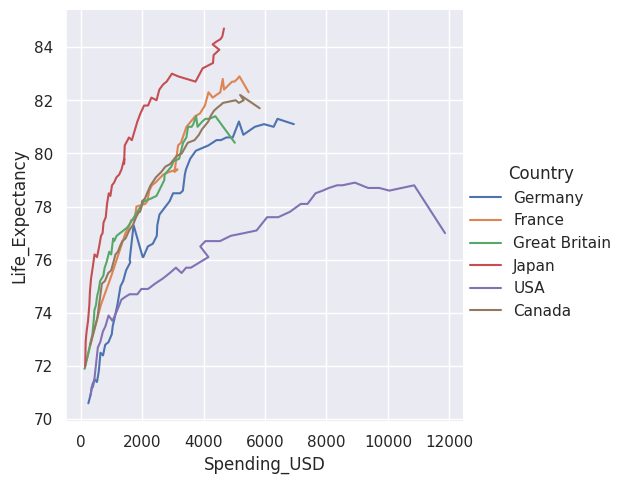

In [28]:
healthexp = sns.load_dataset("healthexp").sort_values("Year")
sns.relplot(
    data=healthexp, kind="line",
    x="Spending_USD", y="Life_Expectancy", hue="Country",
    sort=False
);

y축을 따라 정렬(및 집계)하는 것도 가능합니다.

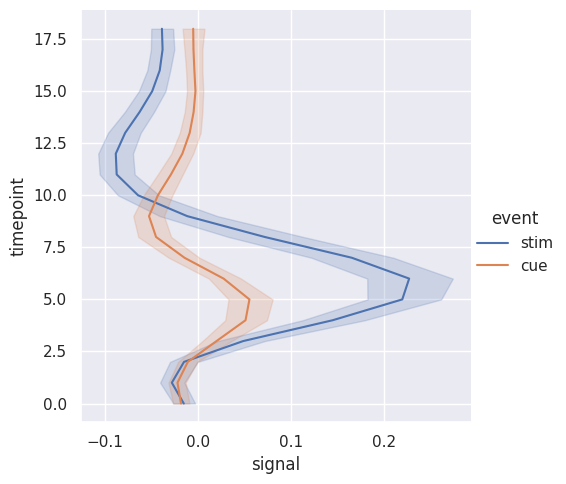

In [29]:
sns.relplot(
    data=fmri, kind="line",
     x="signal", y="timepoint", hue="event",
    orient="y",
);

# Showing multiple relationships with facets

우리는 이 튜토리얼에서 이러한 함수가 한 번에 여러 의미론적 변수를 표시 할 수 있지만 그렇게 하는 것이 항상 효과적인 것은 아니라는 점을 강조했습니다. 그러나 두 변수 사이의 관계가 둘 이상의 다른 변수에 어떻게 의존하는지 이해하고 싶을 때는 어떻습니까?

가장 좋은 방법은 하나 이상의 플롯을 만드는 것입니다. `replot()`은 `FacetGrid`를 기반으로 하기 때문에 쉽게 할 수 있습니다. 추가 변수의 영향을 표시하려면 플롯의 의미론적 역할 중 하나에 변수를 할당하는 대신 시각화를 "패싯"하는 데 사용하십시오. 즉, 여러 축을 만들고 각 축에 대한 데이터의 하위 집합을 그립니다.

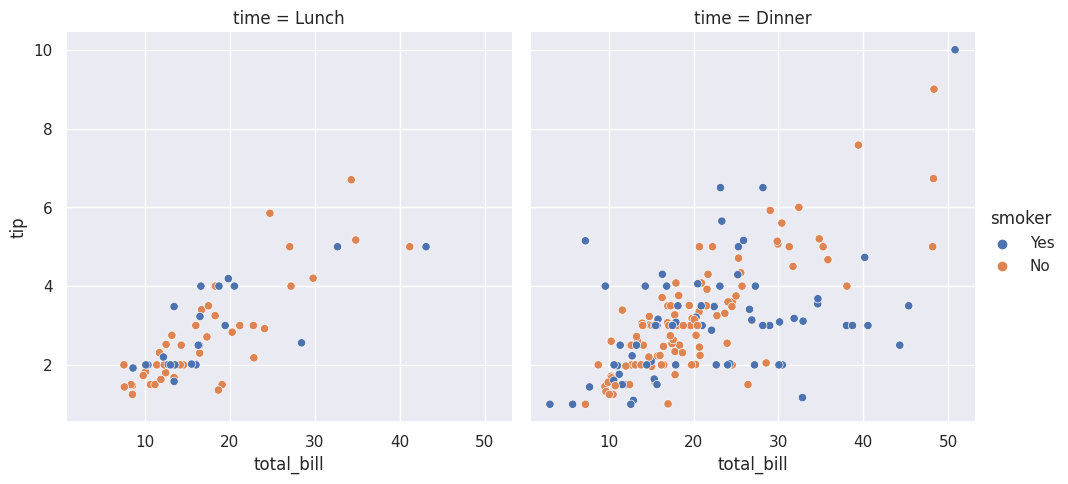

In [30]:
sns.relplot(
    data=tips,
    x="total_bill", y="tip", hue="smoker", col="time",
);

이러한 방식으로 두 변수의 영향을 표시할 수도 있습니다. 하나는 열에 대한 면분할을 통해, 다른 하나는 행에 대한 면분할을 통해 표시할 수 있습니다. 그리드에 더 많은 변수를 추가하기 시작하면 그림 크기를 줄일 수 있습니다. `FacetGrid` 크기는 각 패싯의 높이와 종횡비로 매개변수화됩니다.


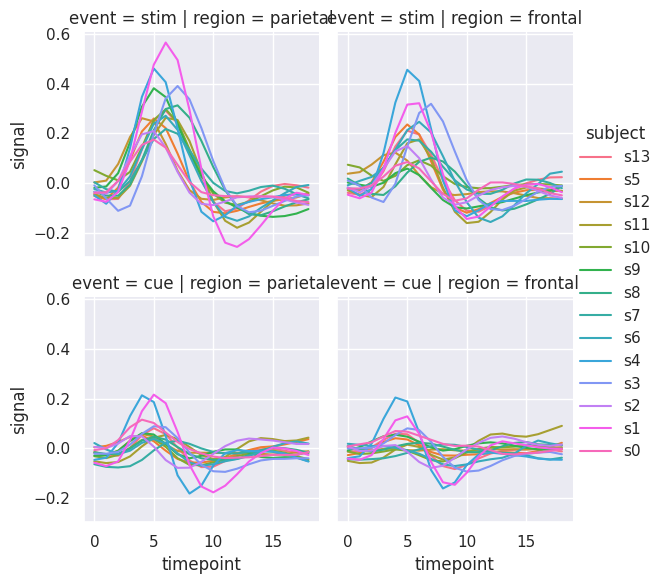

In [31]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", hue="subject",
    col="region", row="event", height=3,
    estimator=None
);

변수의 여러 수준에서 효과를 조사하려는 경우 해당 변수를 열에서 패싯한 다음 패싯을 행으로 "래핑"하는 것이 좋습니다.

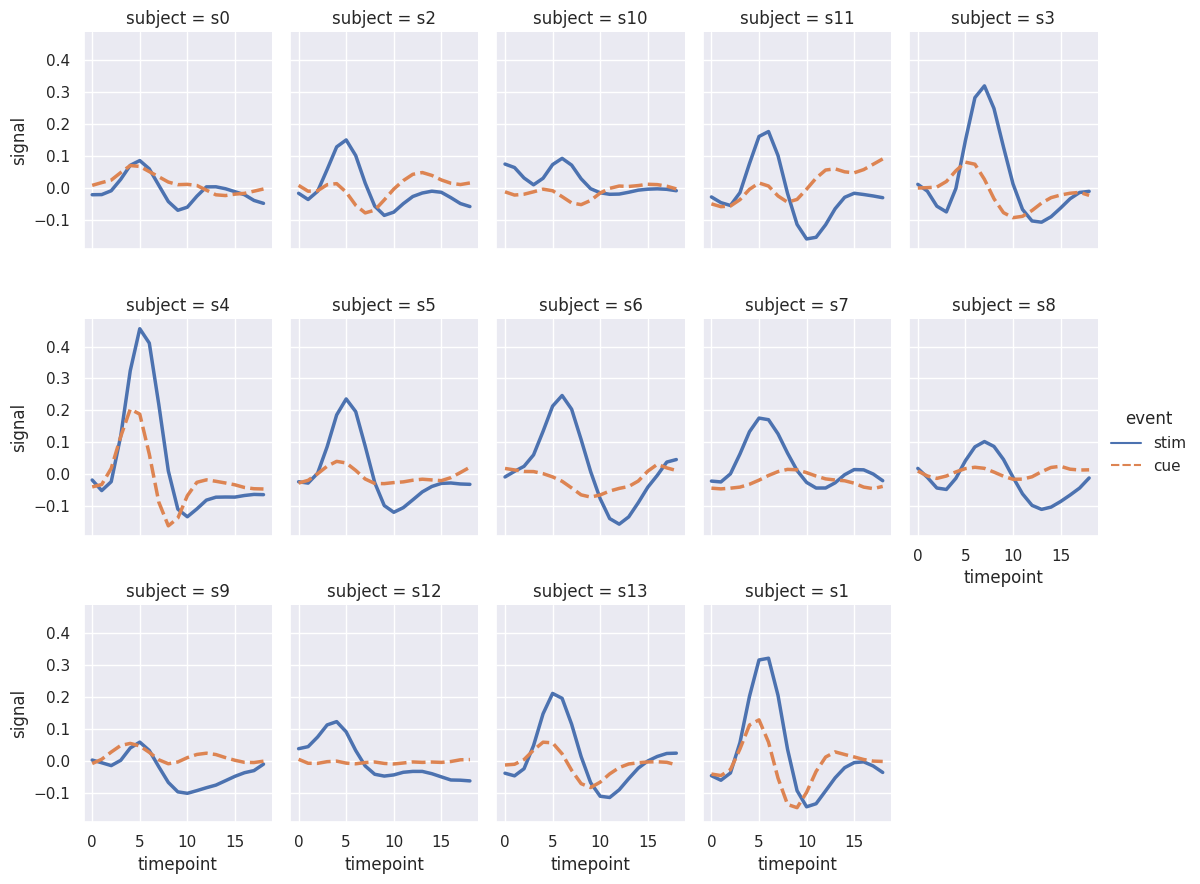

In [32]:
sns.relplot(
    data=fmri.query("region == 'frontal'"), kind="line",
    x="timepoint", y="signal", hue="event", style="event",
    col="subject", col_wrap=5,
    height=3, aspect=.75, linewidth=2.5,
);

"격자" 플롯 또는 "작은 배수"라고도 하는 이러한 시각화는 시각적으로 전체 패턴과 이러한 패턴의 편차를 모두 쉽게 감지할 수 있는 형식으로 데이터를 표시하기 때문에 매우 효과적입니다. 
`scatterplot()` 및 `replot()`이 제공하는 유연성을 활용해야 하지만, 일반적으로 하나의 복잡한 플롯보다 여러 개의 간단한 플롯이 더 효과적이라는 점을 항상 염두에 두십시오.